In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_digits
digit = load_digits()
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
digit.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [4]:
dig = digit.data[2].reshape(8,8)
digit.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

<Figure size 640x480 with 0 Axes>

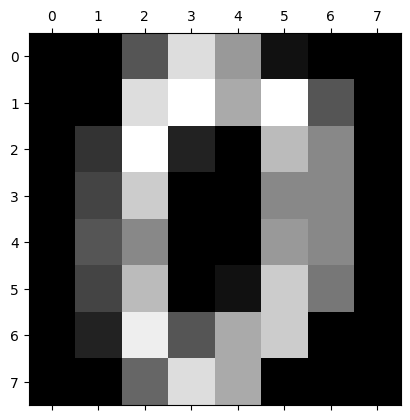

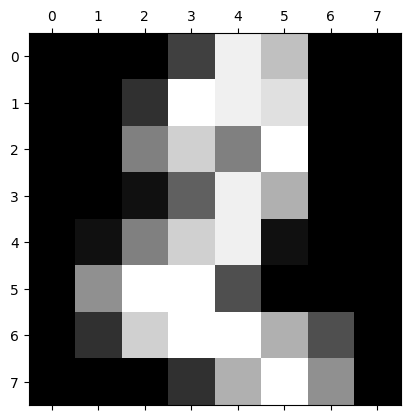

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digit.images[0])
plt.matshow(dig)

In [18]:
X =digit.data
X.shape

(1797, 64)

In [31]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components= 0.95)
X_pca = pca1.fit_transform(digit.data)
X_pca.shape
pca1.n_components_
pca1.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

lor = LogisticRegression(solver= "newton-cholesky")
lor.fit(X_pca,digit.target)
np.mean(cross_val_score(lor,X_pca,digit.target,cv= 10))

0.9243016759776536

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
pca2 = PCA(n_components= 0.95)

p1 = Pipeline([("scale",MinMaxScaler()),
               ("pca",pca2)])

X_new = p1.fit_transform(X)
lor.fit(X_new,digit.target)
np.mean(cross_val_score(lor,X_pca,digit.target,cv= 10))

0.9243016759776536

In [38]:
print(f"PCA1 Explaied: {pca1.explained_variance_ratio_}, \n\n PCA2 Explained: {pca2.explained_variance_ratio_}")

PCA1 Explaied: [0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863 0.01773855 0.01467101 0.01409716 0.01318589 0.01248138
 0.01017718 0.00905617 0.00889538 0.00797123 0.00767493 0.00722904
 0.00695889 0.00596081 0.00575615 0.00515158 0.0048954 ], 

 PCA2 Explained: [0.14815157 0.13523675 0.11706654 0.08316524 0.05736613 0.0485009
 0.04252881 0.03677515 0.03323376 0.03046634 0.02359531 0.02282286
 0.01821312 0.01773373 0.0145856  0.01396272 0.0131002  0.01243018
 0.01020389 0.00909605 0.00890749 0.00797984 0.00788424 0.0076321
 0.00690211 0.00595599 0.00576736 0.00511271 0.00500826 0.00442501]
